In [284]:
from pathlib import Path

import numpy as np
import pandas as pd
import xarray as xr
import altair as alt
import altair_saver

import matplotlib.pyplot as plt

In [79]:
image_path = Path("images")

In [82]:
path = Path("experiments/neumann/20200429_6_300/validation_metrics/metrics.csv")
metrics = pd.read_csv(path)

In [83]:
%pwd

'/Users/yg/code/github/fastMRI'

In [84]:
ds = xr.Dataset.from_dataframe(metrics)

In [85]:
ds = ds.rename({"index": "epochs"})

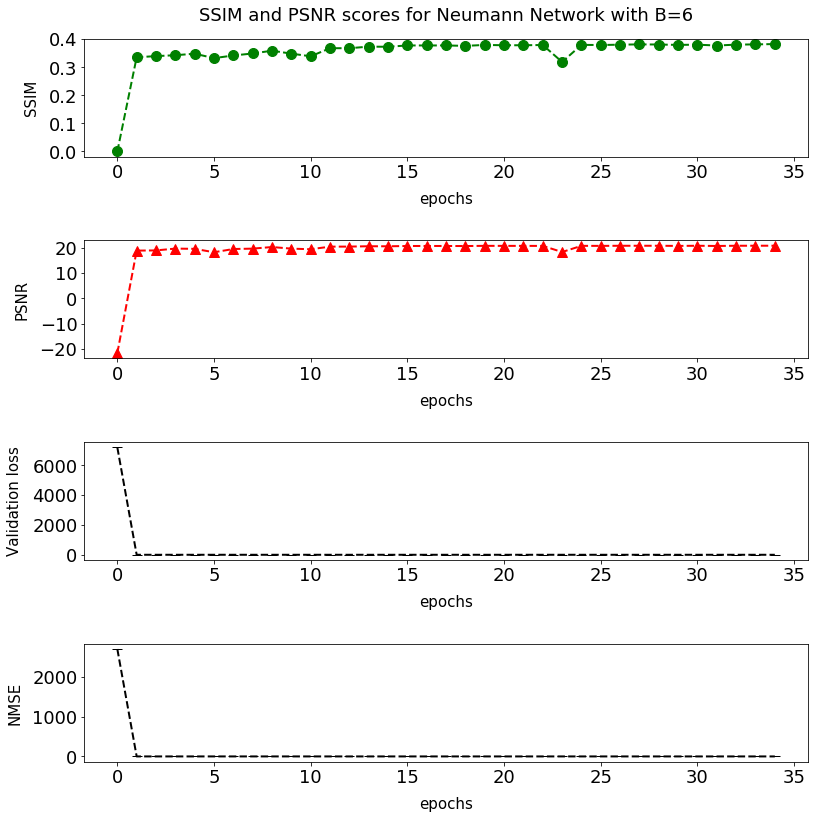

In [324]:
figure, ax = plt.subplots(4, figsize = (12,12), sharex = True)
#figure = plt.figure(figsize=(12, 12))

plot_a = plt.subplot(411)
ds["ssim"].plot(ax=ax[0])
ds["ssim"].plot(linestyle='dashed',color='g', linewidth=2, marker='o',markersize=10)

plot_a.set_title("SSIM and PSNR scores for Neumann Network with B=6",  fontsize=18)
title = plot_a.title
title.set_position([.5, 1.10])
plot_a.set_xlabel("epochs", fontsize=15, labelpad=10)
plot_a.set_ylabel("SSIM", fontsize=15, labelpad=10)
plt.setp(plot_a.get_xticklabels(), fontsize=18)
plt.setp(plot_a.get_yticklabels(), fontsize=18)

plot_b = plt.subplot(412)
ds["psnr"].plot(ax=ax[1])
ds["psnr"].plot(linestyle='dashed',color='r', linewidth=2, marker='^',markersize=10)
plot_b.set_xlabel("epochs", fontsize=15, labelpad=10)
plot_b.set_ylabel("PSNR", fontsize=15, labelpad=10)
plt.setp(plot_b.get_xticklabels(), fontsize=18)
plt.setp(plot_b.get_yticklabels(), fontsize=18)
    
plot_c = plt.subplot(413)
ds["val_loss"].plot(ax=ax[2])
plot_c.set_title("VALIDATION LOSS",  fontsize=18)
title = plot_c.title
title.set_position([.5, 1.10])

ds["val_loss"].plot(linestyle='dashed',color='k', linewidth=2, marker='_',markersize=10)
plot_c.set_xlabel("epochs", fontsize=15, labelpad=10)
plot_c.set_ylabel("Validation loss", fontsize=15, labelpad=10)

plot_c.set_xlabel("epochs", fontsize=15, labelpad=10)
plt.setp(plot_c.get_xticklabels(), fontsize=18)
plt.setp(plot_c.get_yticklabels(), fontsize=18)

plot_d = plt.subplot(414)
ds["nmse"].plot(ax=ax[2])

ds["nmse"].plot(linestyle='dashed',color='k', linewidth=2, marker='_',markersize=10)
plot_d.set_xlabel("epochs", fontsize=15, labelpad=10)
plot_d.set_ylabel("NMSE", fontsize=15, labelpad=10)

plot_d.set_xlabel("epochs", fontsize=15, labelpad=10)
plt.setp(plot_d.get_xticklabels(), fontsize=18)
plt.setp(plot_d.get_yticklabels(), fontsize=18)


plt.gcf().subplots_adjust(bottom=0.3)
plt.gcf().subplots_adjust(left=0.3)
figure.tight_layout(pad=3.0)

plt.savefig(image_path / "ssim_psnr_6_300.pdf", bbox_inches='tight')
plt.show()
plt.close()

# Metrics in terms of B

In [238]:
path_4 = Path("experiments/neumann/20200426_blocks_4/validation_metrics/metrics.csv")
metrics_4 = pd.read_csv(path_4)
metrics_4.index = metrics_4.index.set_names(['epochs'])
metrics_4['Block'] = metrics_4["val_loss"].map(lambda x: "BLOCK_4")

In [239]:
metrics_4.head()

,val_loss,nmse,ssim,psnr,Block
epochs,,,,,
0,1774.711304,560.512501,0.000037,-15.370277,BLOCK_4
1,2.065619,0.695145,0.304040,16.184333,BLOCK_4
2,1.668418,0.567505,0.295421,17.075087,BLOCK_4
3,1.004024,0.343511,0.315740,19.240966,BLOCK_4
4,1.041006,0.355162,0.326016,19.098446,BLOCK_4


In [240]:
path_6 = Path("experiments/neumann/20200426_blocks_6/validation_metrics/metrics.csv")
metrics_6 = pd.read_csv(path_6)
metrics_6.index = metrics_6.index.set_names(['epochs'])
metrics_6['Block'] = metrics_6["val_loss"].map(lambda x: "BLOCK_6")

In [241]:
path_8 = Path("experiments/neumann/20200425_blocks_8/validation_metrics/metrics.csv")
metrics_8 = pd.read_csv(path_8)
metrics_8.index = metrics_8.index.set_names(['epochs'])
metrics_8['Block'] = metrics_8["val_loss"].map(lambda x: "BLOCK_8")

In [330]:
path_10 = Path("experiments/neumann/20200425_blocks_10/validation_metrics/metrics.csv")
metrics_10 = pd.read_csv(path_10)
metrics_10.index = metrics_10.index.set_names(['epochs'])
metrics_10['Block'] = metrics_10["val_loss"].map(lambda x: "BLOCK_10")

In [333]:
def base_chart(df, col_name, color_name):
    """Return an Altair chart."""

    base = alt.Chart(
        df.reset_index(),
        width=500,
        height=300,
    ).mark_line(strokeWidth=5.0
    ).encode(
        x="epochs", 
        y=col_name,
        color=color_name,
        #shape="Block",
    )
    return base

def layer_charts(dfs, chart_func, col_name, color_name):
    """Return a layered chart."""

    alt_layer = alt.layer(*[chart_func(df, col_name, color_name) for df in dfs])
    #alt_layer = alt_layer.configure_axis(
    #    labelFontSize=20,
    #    titleFontSize=20,
    #)
    #alt_layer = alt_layer.configure_legend(
    #strokeColor='gray',
    #fillColor='#EEEEEE',
    #padding=10,
    #cornerRadius=10,
    #orient='bottom-right'
    #)
    return alt_layer

def concat_block_charts():
    ssim_chart = layer_charts([metrics_4, metrics_6, metrics_8], base_chart, "ssim", "Block")
    psnr_chart = layer_charts([metrics_4, metrics_6, metrics_8], base_chart, "psnr", "Block")
    concat_c = alt.vconcat(ssim_chart, psnr_chart, title="Results with different number of blocks")
    concat_c = concat_c.configure_axis(
        labelFontSize=20,
        titleFontSize=20,
    )
    concat_c = concat_c.configure_legend(
    strokeColor='gray',
    fillColor='#EEEEEE',
    padding=10,
    cornerRadius=10,
    orient='bottom-right'
    )
    return concat_c
    

In [334]:
concat_block_charts()

alt.VConcatChart(...)

In [429]:
path = Path("experiments/neumann/20200426_blocks_6/validation_metrics/metrics.csv")
metrics_100 = pd.read_csv(path)
metrics_100.index = metrics_100.index.set_names(['epochs'])
metrics_100['IMAGE_COUNT'] = metrics_100["val_loss"].map(lambda x: "100")

In [430]:
path = Path("experiments/neumann/20200428_6_200/validation_metrics/metrics.csv")
metrics_200 = pd.read_csv(path)
metrics_200.index = metrics_200.index.set_names(['epochs'])
metrics_200['IMAGE_COUNT'] = metrics_200["val_loss"].map(lambda x: "200")

In [437]:
path = Path("experiments/neumann/20200429_6_300/validation_metrics/metrics.csv")
metrics_300 = pd.read_csv(path)
metrics_300.index = metrics_300.index.set_names(['epochs'])
metrics_300['IMAGE_COUNT'] = metrics_300["val_loss"].map(lambda x: "300")

In [438]:
path = Path("experiments/neumann/20200504_6_400/validation_metrics/metrics.csv")
metrics_400 = pd.read_csv(path)
metrics_400.index = metrics_400.index.set_names(['epochs'])
metrics_400['IMAGE_COUNT'] = metrics_400["val_loss"].map(lambda x: "400")

In [443]:
def concat_image_count_charts():
    ssim_chart = layer_charts([metrics_100, metrics_200, metrics_300, metrics_400], base_chart, "ssim", "IMAGE_COUNT")
    psnr_chart = layer_charts([metrics_100, metrics_200, metrics_300, metrics_400], base_chart, "psnr", "IMAGE_COUNT")
    concat_c = alt.vconcat(ssim_chart, psnr_chart,  title="Results with different number of training images")
#     concat_c = chart.properties(
#        title="Results with different number of training images",
#     )
    concat_c = concat_c.configure_title(fontSize=24) 
    concat_c = concat_c.configure_axis(
        labelFontSize=20,
        titleFontSize=20,
    )
    concat_c = concat_c.configure_legend(
    strokeColor='gray',
    fillColor='#EEEEEE',
    padding=10,
    cornerRadius=10,
    orient='bottom-right'
    )
    return concat_c

In [444]:
concat_image_count_charts()

alt.VConcatChart(...)

# Unet

In [416]:
path = Path("experiments/unet/20200426_unet_epochs_50/validation_metrics/metrics.csv")
unet_metrics = pd.read_csv(path)
unet_metrics = unet_metrics.drop(["psnr"], axis=1)
unet_metrics.index = unet_metrics.index.set_names(['epochs'])

In [417]:
unet_metrics.head()

,val_loss,nmse,ssim
epochs,,,
0,0.964204,0.905179,0.114155
1,0.391532,0.056841,0.571959
2,0.381836,0.054667,0.580472
3,0.366805,0.049997,0.592289
4,0.366047,0.049621,0.597296


In [418]:
data = unet_metrics.reset_index().melt('epochs')
data.columns = ["epochs", "metric", "value"]
chart = alt.Chart(data,
         width=600,
        height=300).mark_line(strokeWidth=3.0).encode(
    x='epochs',
    y='value',
    color='metric'
)
chart = chart.configure_axis(
        labelFontSize=20,
        titleFontSize=20,
    )
chart = chart.configure_legend(
    strokeColor='gray',
    fillColor='#EEEEEE',
    padding=10,
    cornerRadius=10,
    orient='bottom-right'
)
chart = chart.properties(
    title="Unet metrics",
)
chart = chart.configure_title(fontSize=24)  
chart = chart.resolve_scale(
    color='independent'
)

In [419]:
chart

alt.Chart(...)

In [422]:
path = Path("experiments/unet/20200426_unet_epochs_50/validation_metrics/metrics.csv")
unet_metrics = pd.read_csv(path)
unet_metrics = unet_metrics.drop(["val_loss", "nmse", "ssim"], axis=1)
unet_metrics.index = unet_metrics.index.set_names(['epochs'])

In [427]:
data = unet_metrics.reset_index().melt('epochs')
data.columns = ["epochs", "metric", "value"]
chart = alt.Chart(data,
         width=600,
        height=300).mark_line(strokeWidth=3.0).encode(
    x='epochs',
    y='value',
    color='metric'
)
chart = chart.configure_axis(
        labelFontSize=20,
        titleFontSize=20,
    )
# chart = chart.configure_legend(
#     strokeColor='gray',
#     fillColor='#EEEEEE',
#     padding=10,
#     cornerRadius=10,
#     orient='bottom-right'
# )
chart = chart.properties(
    title="Unet PSNR",
)
chart = chart.configure_title(fontSize=24)  

In [428]:
chart

alt.Chart(...)